In [146]:
import matplotlib.pyplot as plt

import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style('darkgrid')
mpl.rcParams['figure.figsize']=(20,5)
import csv




In [147]:
raw=pd.read_csv('C:\\Users\danzengy\Southern\DF_Raw_Data.csv',index_col=1)
std=pd.read_csv('C:\\Users\danzengy\Southern\DF_Rolling_Stdev.csv')


raw.describe()
#raw.info()
#std.describe()
#std.info()



,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE
count,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000
mean,41.802629,41.796702,90.796576,202.851610,50.226661,3.540897,76.015149,0.021199
std,3.656576,3.654873,10.217885,22.683977,5.298203,0.579055,6.651633,0.144075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.050000,41.000000,85.000000,191.000000,48.000000,3.220000,74.560000,0.000000
50%,42.100000,42.140000,91.000000,203.000000,51.000000,3.480000,76.620000,0.000000
75%,43.140000,43.130000,97.000000,215.000000,53.000000,3.780000,78.470000,0.000000
max,45.900000,45.840000,124.000000,264.000000,65.000000,7.560000,83.450000,1.000000


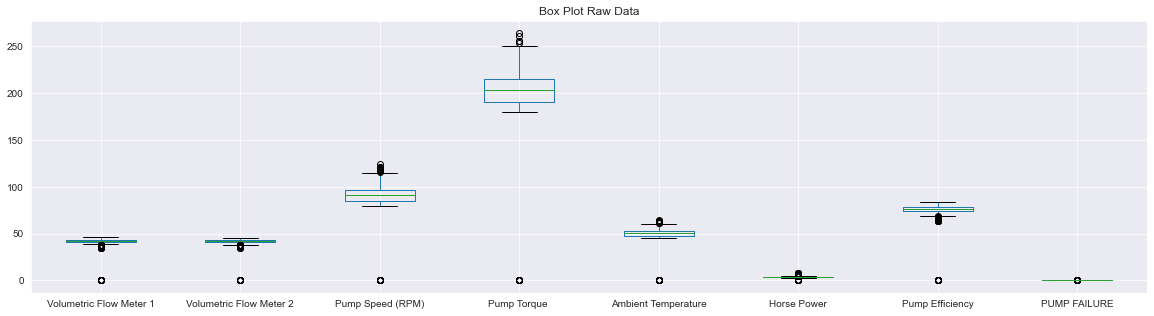

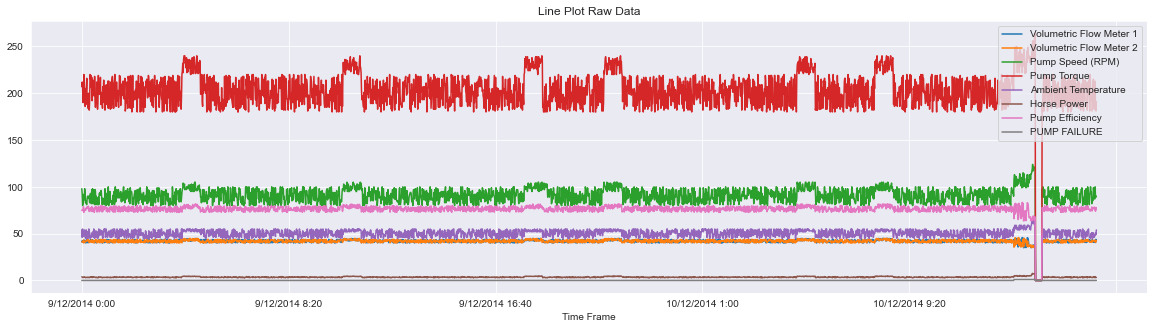

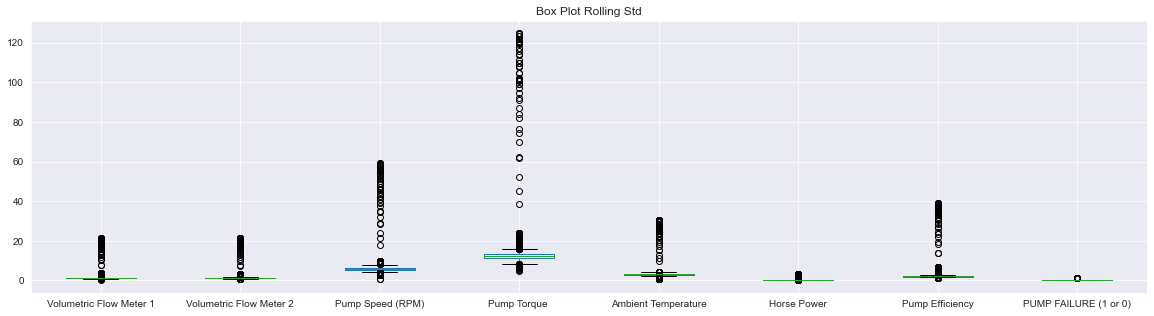

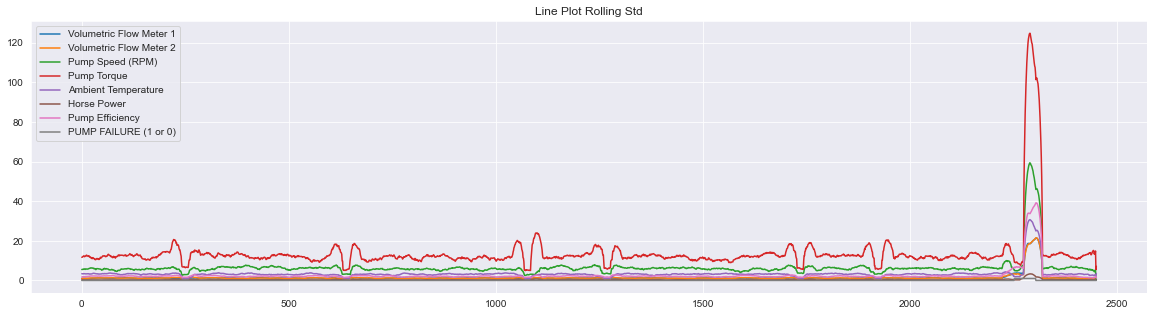

In [148]:
#mpl.rcParams['figure.figsize'] = (22,6)
raw.plot(kind='box', title='Box Plot Raw Data')
raw.plot(kind='line', title= 'Line Plot Raw Data')
std.plot(kind='box', title= 'Box Plot Rolling Std')
std.plot(kind='line', title= 'Line Plot Rolling Std')
plt.show()

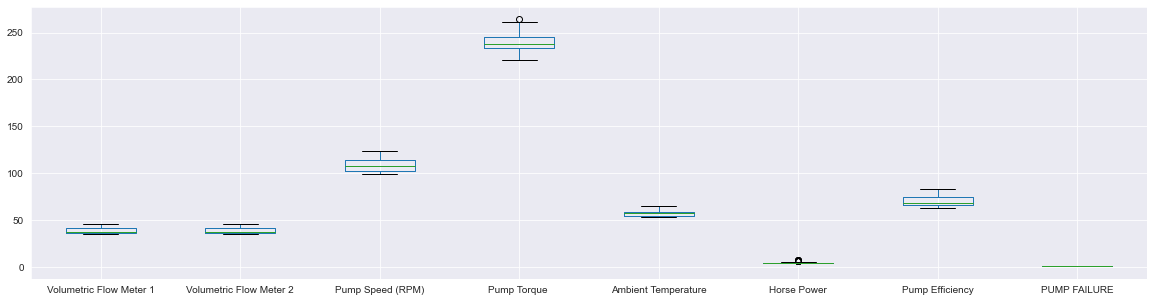

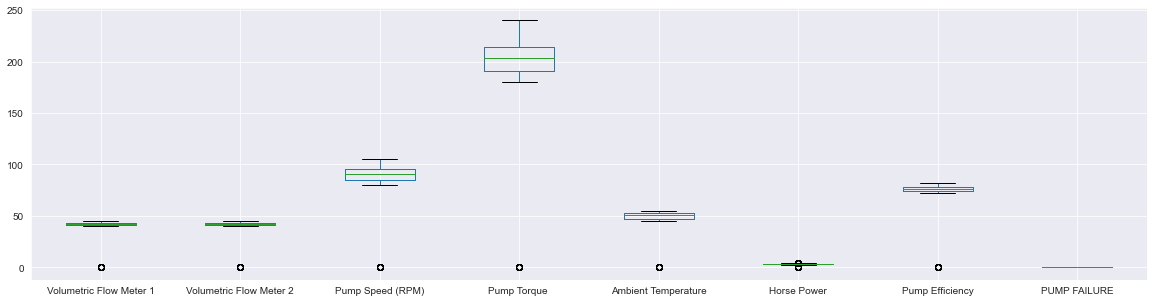

In [149]:
pump_working = raw['PUMP FAILURE']== 1
dfPump = raw[pump_working] 
dfPump.plot(kind='box')

pump_fail = raw['PUMP FAILURE']== 0
dffail = raw[pump_fail] 
dffail.plot(kind='box')

plt.show()


#When looking at the graphs from this point of view  you can see that when the pump fails all the different 
#componets are at the value zero signifying that the components are no longer working


In [150]:
q1=raw.quantile(.25)
q3=raw.quantile(.75)
iqr=q3-q1
#print(iqr)
upper_range=q3+1.5*iqr
lower_range=q1-1.5*iqr
#print(lower_range)

no_outliers=raw[((raw>lower_range)&(raw<upper_range)).any(axis=1)]
outliers=raw[((raw < lower_range) | ((raw >upper_range ))).any(axis=1)]
prop_outliers=len(outliers)*100/len(raw)


print('Total raw data:',len(raw))
print('Total outliers:', len(outliers))
print('No outliers', len(no_outliers))
print('Percent of proportion of outliers', prop_outliers)



Total raw data: 2453
Total outliers: 95
No outliers 2433
Percent of proportion of outliers 3.8728088055442313


<AxesSubplot:>

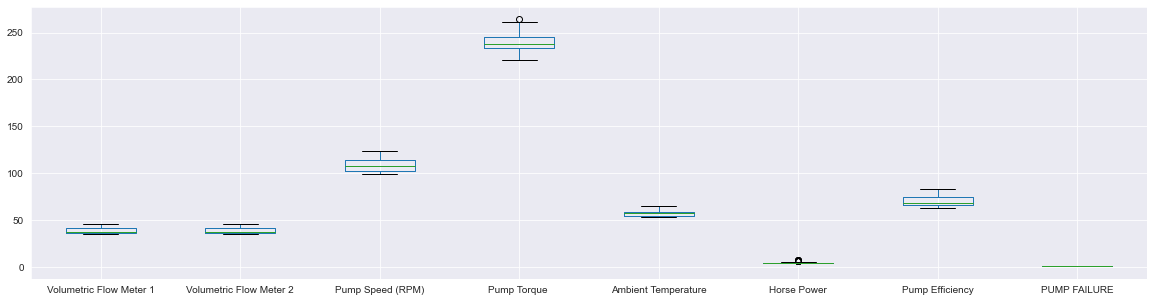

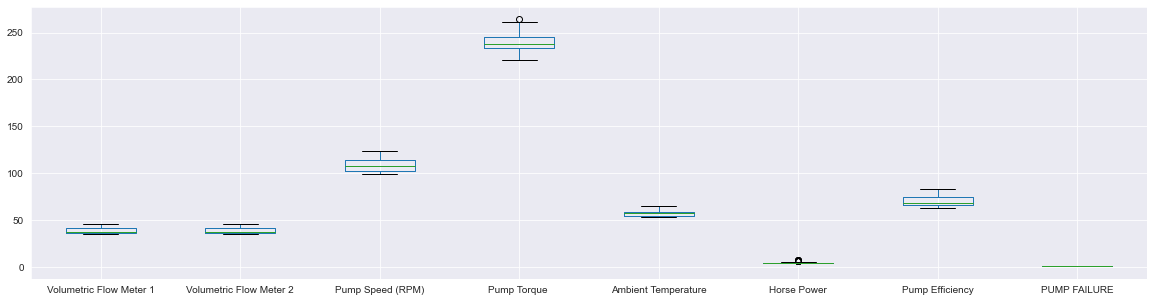

In [151]:
new_box=raw[~((raw<lower_range)&(raw>upper_range)).any(axis=1)]
#print(new_box)
pump_working1 = new_box['PUMP FAILURE']== 1
dfPump1 = new_box[pump_working1] 
dfPump1.plot(kind='box')


pump_working2 = new_box['PUMP FAILURE']== 0
dfPump2 = new_box[pump_working1] 
dfPump2.plot(kind='box')


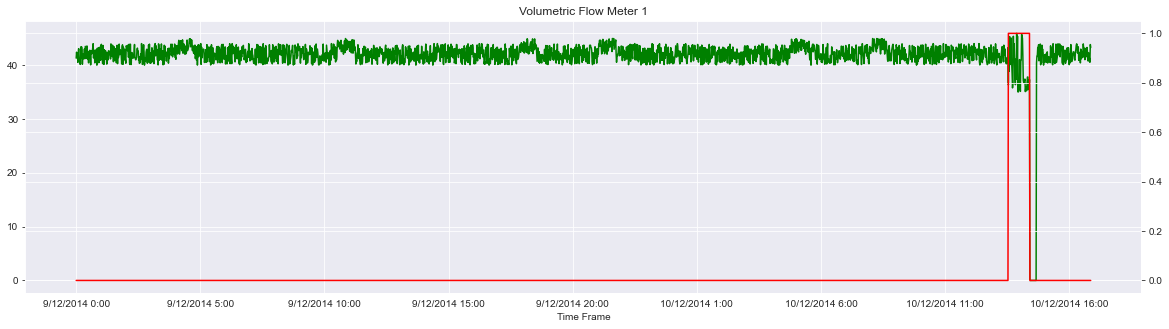

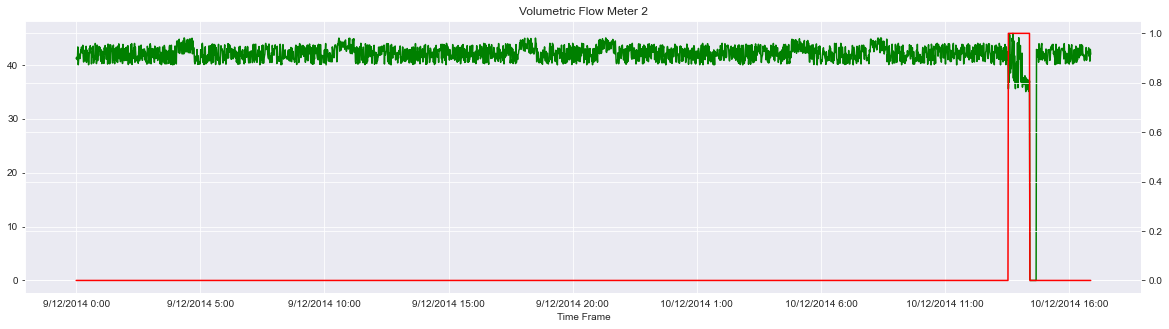

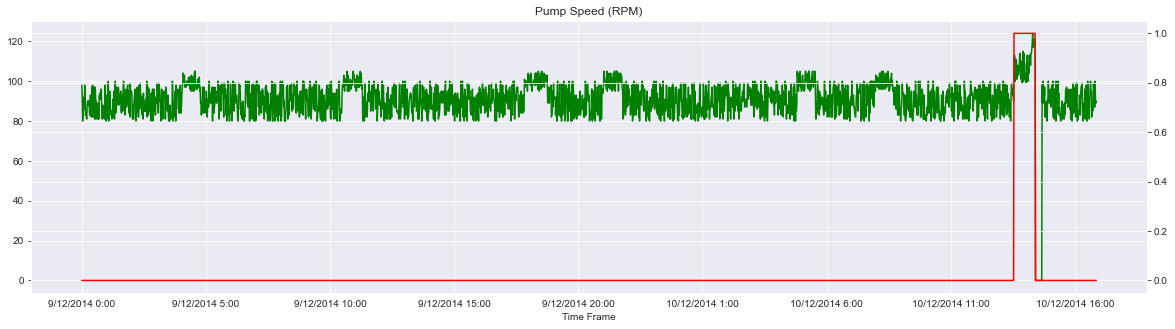

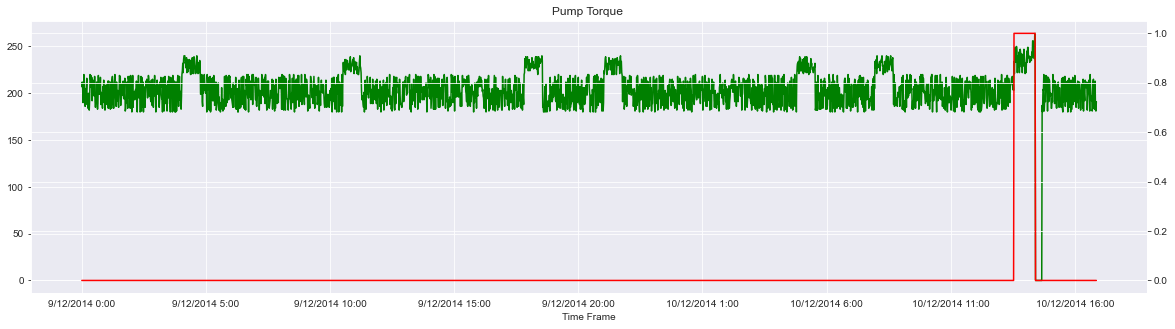

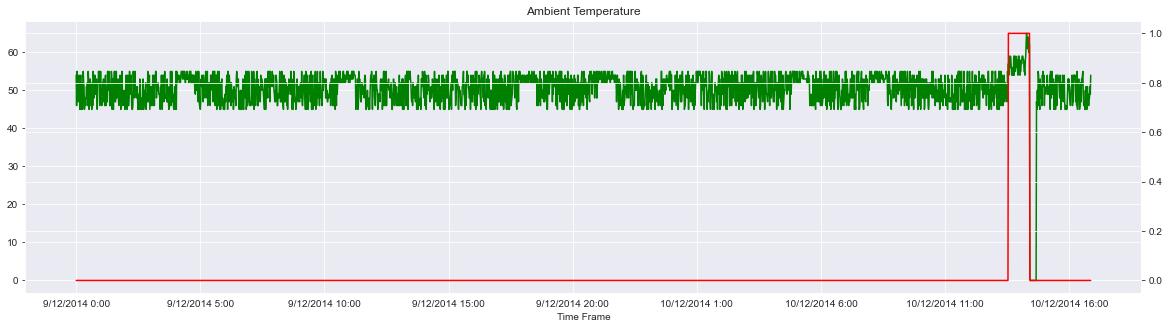

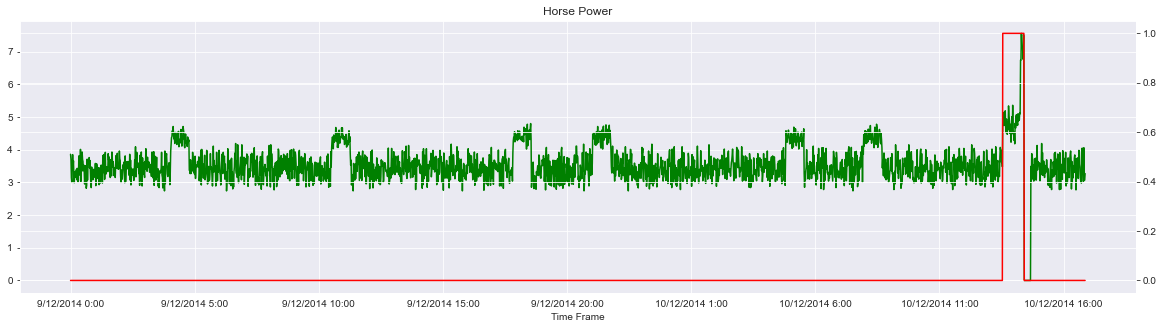

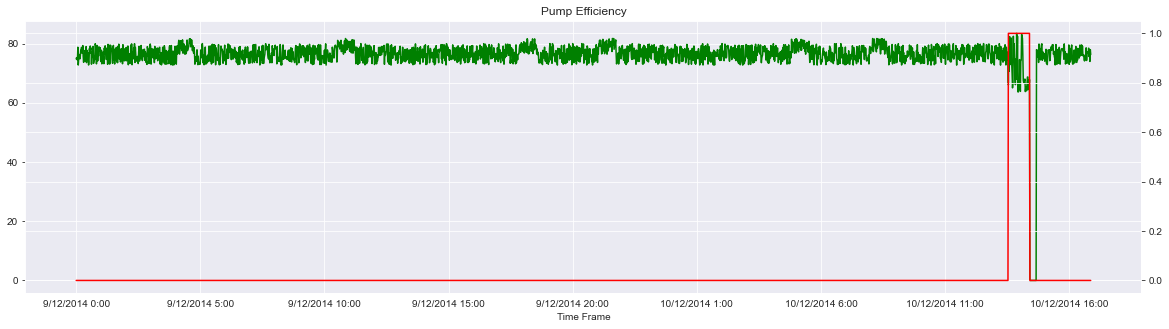

In [152]:
listOfVariables = ['Volumetric Flow Meter 1',
       'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ',
       'Ambient Temperature', 'Horse Power', 'Pump Efficiency']

for item in listOfVariables:
    first_axis=raw[item].plot(color='green')
    second_axis=first_axis.twinx()
    second_axis.plot(raw['PUMP FAILURE'], color='red')
    second_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
    plt.title(item)
    plt.show()
